# Part 3.1
Instead of keeping the word embeddings fixed, now update the word embeddings (the same
way as model parameters) during the training process

In [1]:
from datasets import load_dataset
from utils.rnn_model import *
from utils.rnn_utils import *
from utils.utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Preparation

In [2]:
BATCH_SIZE = 32
LR = 0.0001
MODEL_TYPE = "rnn"

In [3]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [4]:
sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

word2vec_model1 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model2 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")
word2vec_model3 = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [5]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model1.index_to_key
    )
}

In [6]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [7]:
trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

# Models

## Max Pool Model

In [8]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model1.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [9]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="max_pool"
)

Epoch   1/100, Loss: 0.6957, Accuracy: 0.5159
Model saved.
Epoch   2/100, Loss: 0.6900, Accuracy: 0.5150
Epoch   3/100, Loss: 0.6750, Accuracy: 0.6013
Model saved.
Epoch   4/100, Loss: 0.5873, Accuracy: 0.6473
Model saved.
Epoch   5/100, Loss: 0.4342, Accuracy: 0.6970
Model saved.
Epoch   6/100, Loss: 0.3180, Accuracy: 0.6942
Epoch   7/100, Loss: 0.2403, Accuracy: 0.7242
Model saved.
Epoch   8/100, Loss: 0.1803, Accuracy: 0.7111
Epoch   9/100, Loss: 0.1406, Accuracy: 0.7008
Epoch  10/100, Loss: 0.1058, Accuracy: 0.7129
Epoch  11/100, Loss: 0.0824, Accuracy: 0.7036
Epoch  12/100, Loss: 0.0647, Accuracy: 0.6970
Epoch  13/100, Loss: 0.0536, Accuracy: 0.7008
Epoch  14/100, Loss: 0.0386, Accuracy: 0.6867
Epoch  15/100, Loss: 0.0298, Accuracy: 0.6970
Epoch  16/100, Loss: 0.0253, Accuracy: 0.6961
Epoch  17/100, Loss: 0.0210, Accuracy: 0.6998
Early stopping triggered after 17 epochs.
Training ended, loading best model...
Model loaded.


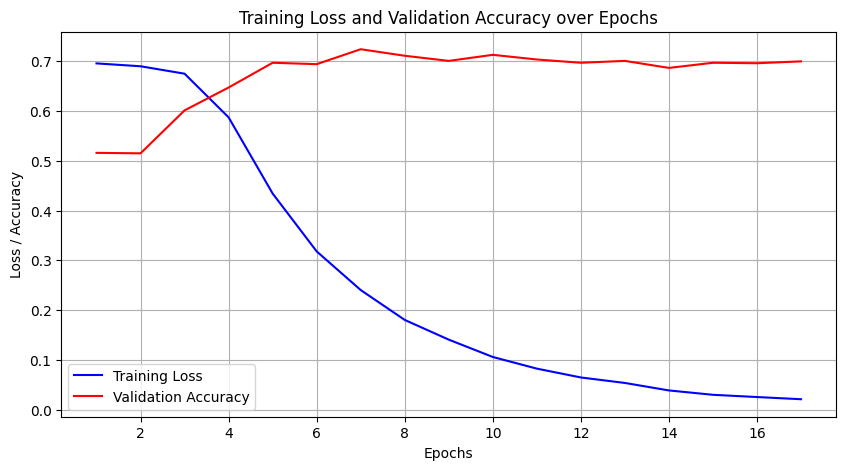

In [10]:
plot_loss_accuracy(losses, accuracies)

In [11]:
max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7270


## Mean Max Pool Model

In [12]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model2.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [13]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="mean_max"
)

Epoch   1/100, Loss: 0.6947, Accuracy: 0.5009
Model saved.
Epoch   2/100, Loss: 0.6902, Accuracy: 0.5084
Model saved.
Epoch   3/100, Loss: 0.6559, Accuracy: 0.6510
Model saved.
Epoch   4/100, Loss: 0.5284, Accuracy: 0.7101
Model saved.
Epoch   5/100, Loss: 0.3933, Accuracy: 0.7317
Model saved.
Epoch   6/100, Loss: 0.2916, Accuracy: 0.7270
Epoch   7/100, Loss: 0.2242, Accuracy: 0.7092
Epoch   8/100, Loss: 0.1697, Accuracy: 0.7214
Epoch   9/100, Loss: 0.1268, Accuracy: 0.7139
Epoch  10/100, Loss: 0.0977, Accuracy: 0.6998
Epoch  11/100, Loss: 0.0721, Accuracy: 0.7054
Epoch  12/100, Loss: 0.0583, Accuracy: 0.6989
Epoch  13/100, Loss: 0.0447, Accuracy: 0.7111
Epoch  14/100, Loss: 0.0329, Accuracy: 0.6961
Epoch  15/100, Loss: 0.0307, Accuracy: 0.7054
Early stopping triggered after 15 epochs.
Training ended, loading best model...
Model loaded.


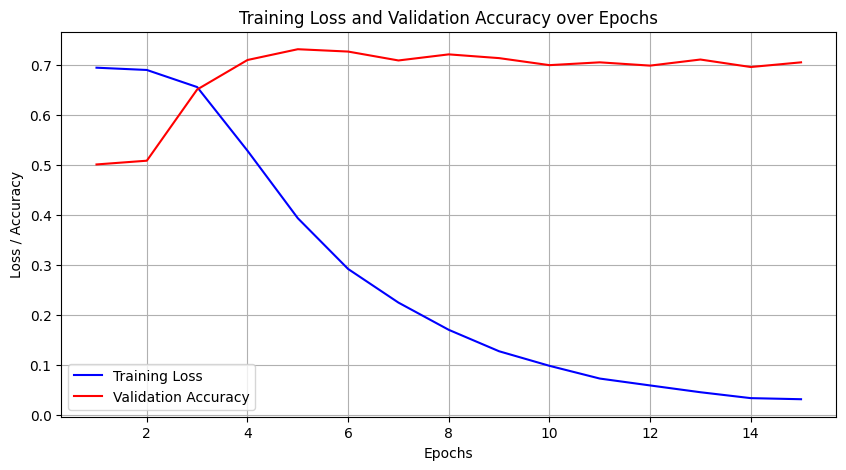

In [14]:
plot_loss_accuracy(losses, accuracies)

In [15]:
mean_max_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7233


## Attention Model

In [16]:
model = RNNModel(
    embedding_dim=350,
    hidden_size=128,
    embedding_matrix=word2vec_model3.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [17]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="attention"
)

Epoch   1/100, Loss: 0.6948, Accuracy: 0.4859
Model saved.
Epoch   2/100, Loss: 0.6894, Accuracy: 0.4906
Model saved.
Epoch   3/100, Loss: 0.6821, Accuracy: 0.5216
Model saved.
Epoch   4/100, Loss: 0.6253, Accuracy: 0.6614
Model saved.
Epoch   5/100, Loss: 0.4735, Accuracy: 0.7167
Model saved.
Epoch   6/100, Loss: 0.3446, Accuracy: 0.7233
Model saved.
Epoch   7/100, Loss: 0.2476, Accuracy: 0.7167
Epoch   8/100, Loss: 0.1852, Accuracy: 0.7054
Epoch   9/100, Loss: 0.1323, Accuracy: 0.7073
Epoch  10/100, Loss: 0.0953, Accuracy: 0.6970
Epoch  11/100, Loss: 0.0694, Accuracy: 0.6970
Epoch  12/100, Loss: 0.0512, Accuracy: 0.7017
Epoch  13/100, Loss: 0.0385, Accuracy: 0.7008
Epoch  14/100, Loss: 0.0258, Accuracy: 0.6867
Epoch  15/100, Loss: 0.0198, Accuracy: 0.7017
Epoch  16/100, Loss: 0.0131, Accuracy: 0.6979
Early stopping triggered after 16 epochs.
Training ended, loading best model...
Model loaded.


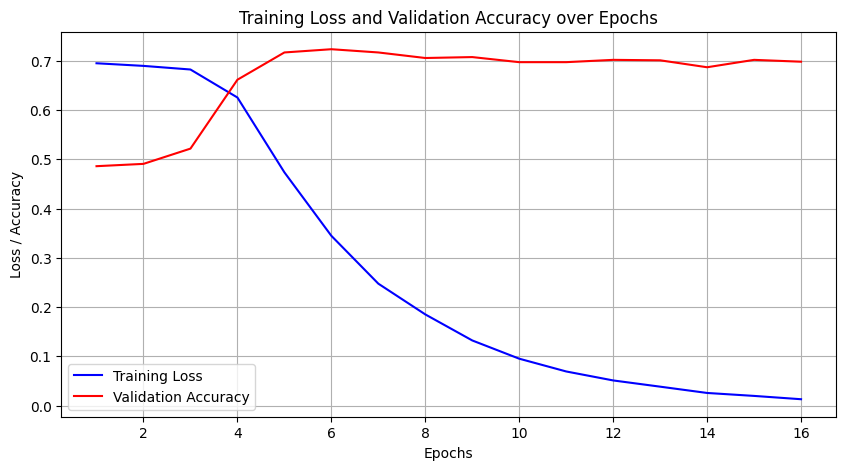

In [18]:
plot_loss_accuracy(losses, accuracies)

In [19]:
attn_tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7261


# Results

In [21]:
print(f"Max Pool Test Accuracy:         {max_tst_accuracy:.4f}")
print(f"Mean Max Pool Test Accuracy:    {mean_max_tst_accuracy:.4f}")
print(f"Attention Test Accuracy:        {attn_tst_accuracy:.4f}")

Max Pool Test Accuracy:         0.7270
Mean Max Pool Test Accuracy:    0.7233
Attention Test Accuracy:        0.7261


From the above results, it is evident that training the word embeddings results in a much higher accuracy compared to not training word embeddings

| Method | Part 2 Test Accuracy | Part 3.1 Test Accuracy |
| --- | --- | --- |
| Max Pooling | 0.5985 | 0.7270 |
| Mean Max Pooling | 0.5947 | 0.7233 |
| Attention Mask | 0.6135 | 0.7261 |

Since Max Pooling has the highest accuracy, we will only be training this method of sentence representation extraction from now on